# Alppaka: Analysis Of Profitable App Profiles for the App Store and Google Play Markets (refactored to pandas)

## What is this project about?
Analyze data from the App Store and the Google Play Store to identify the most profitable mobile apps in order to suggest data-driven decisions for type of features or/and products that should to be implemented.

## What is its goal?
Develop personal knowledge and essential skills for data analysis in Python, in this case especially with Pandas library.

## Next steps
- <s>Import pandas and matplotlib</s>
- <s>Data visualization</s>
- More conclusions

## Resources
- Dataquest.io:
https://app.dataquest.io/m/350/guided-project%3A-profitable-app-profiles-for-the-app-store-and-google-play-markets
- App Store data set:
https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps/home
- Google Play Store data set: https://www.kaggle.com/lava18/google-play-store-apps/home



In [1]:
from csv import reader
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import numpy as np
from pathlib import Path
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from pysankey import sankey
import plotly.graph_objects as go

from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import f

# Google Play Store data set
android = open('googleplaystore.csv')
df_android = pd.read_csv('googleplaystore.csv')

# Apple Store data set
ios = open('AppleStore.csv')
df_ios = pd.read_csv('AppleStore.csv')


sns.set()

In [2]:
# Checking the data types - must be pandas data frames
print(type(df_android))
print(type(df_ios))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [3]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df_ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [5]:
# Check number of apps and columns for Google Play Store

print("Number of apps:", len(df_android))
print("Number of columns:", len(df_android.columns))

Number of apps: 10841
Number of columns: 13


In [6]:
# Check number of apps and columns for Apple Store

print("Number of apps:", len(df_ios))
print("Number of columns:", len(df_ios.columns))

Number of apps: 7197
Number of columns: 16


## Data cleaning

- Checking values of columns
- Checking the row/s with n/a value
- Removing duplicates entities
- Removing non-English apps
- Isolating the free apps

### Checking values of columns for Android

In [7]:
# Check values of column 'Category'
df_android['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
# Check which row contains value `1.9` in the column `Category`
array = ['1.9']
df_android.loc[df_android['Category'].isin(array)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
# Delete row 10472
df_android = df_android.drop(10472, axis=0)
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [10]:
# Check values of column 'Rating'
df_android['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8,
       2.7, 1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2])

In [11]:
# Check values of column 'Reviews'
df_android['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [12]:
# Check values of column 'Size'
df_android['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [13]:
# Check which rows contain value `Varies with device`
array = ['Varies with device']
df_android.loc[df_android['Size'].isin(array)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
37,Floor Plan Creator,ART_AND_DESIGN,4.1,36639,Varies with device,"5,000,000+",Free,0,Everyone,Art & Design,"July 14, 2018",Varies with device,2.3.3 and up
42,Textgram - write on photos,ART_AND_DESIGN,4.4,295221,Varies with device,"10,000,000+",Free,0,Everyone,Art & Design,"July 30, 2018",Varies with device,Varies with device
52,Used Cars and Trucks for Sale,AUTO_AND_VEHICLES,4.6,17057,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
67,Ulysse Speedometer,AUTO_AND_VEHICLES,4.3,40211,Varies with device,"5,000,000+",Free,0,Everyone,Auto & Vehicles,"July 30, 2018",Varies with device,Varies with device
68,REPUVE,AUTO_AND_VEHICLES,3.9,356,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 25, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10713,My Earthquake Alerts - US & Worldwide Earthquakes,WEATHER,4.4,3471,Varies with device,"100,000+",Free,0,Everyone,Weather,"July 24, 2018",Varies with device,Varies with device
10725,Posta App,MAPS_AND_NAVIGATION,3.6,8,Varies with device,"1,000+",Free,0,Everyone,Maps & Navigation,"September 27, 2017",Varies with device,4.4 and up
10765,Chat For Strangers - Video Chat,SOCIAL,3.4,622,Varies with device,"100,000+",Free,0,Mature 17+,Social,"May 23, 2018",Varies with device,Varies with device
10826,Frim: get new friends on local chat rooms,SOCIAL,4.0,88486,Varies with device,"5,000,000+",Free,0,Mature 17+,Social,"March 23, 2018",Varies with device,Varies with device


Since there is a lot of rows containing `Varies with device` value, none of the rows are deleted.

In [14]:
# Check values of column 'Installs'
df_android['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [15]:
# Check values of column 'Type'
df_android['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [16]:
# Check values of column 'Price'
df_android['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [17]:
# Check values of column 'Content Rating'
df_android['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [18]:
# Check values of column 'Genres'
df_android['Genres'].unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

In [19]:
# Check values of column 'Last Updated'
df_android['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

In [20]:
# Check values of column 'Current Ver'
df_android['Current Ver'].unique()

array(['1.0.0', '2.0.0', '1.2.4', ..., '1.0.612928', '0.3.4', '2.0.148.0'],
      dtype=object)

In [21]:
# Check values of column 'Android Ver'
df_android['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

### Checking values of columns for Apple Store

In [22]:
df_ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [23]:
# Check values of column 'size_bytes'
df_ios['size_bytes'].unique()

array([389879808, 113954816, 116476928, ...,  16808960,  91468800,
        83026944])

In [24]:
# Check values of column 'currency'
df_ios['currency'].unique()

array(['USD'], dtype=object)

In [25]:
# Check values of column 'price'
df_ios['price'].unique()

array([  0.  ,   1.99,   0.99,   6.99,   2.99,   7.99,   4.99,   9.99,
         3.99,   8.99,   5.99,  14.99,  13.99,  19.99,  17.99,  15.99,
        24.99,  20.99,  29.99,  12.99,  39.99,  74.99,  16.99, 249.99,
        11.99,  27.99,  49.99,  59.99,  22.99,  18.99,  99.99,  21.99,
        34.99, 299.99,  23.99,  47.99])

In [26]:
# Check values of column 'rating_count_tot'
df_ios['rating_count_tot'].unique()

array([2974676, 2161558, 2130805, ...,       2,       1,       0])

In [27]:
# Check values of column 'rating_count_ver'
df_ios['rating_count_ver'].unique()

array([ 212, 1289,  579, ...,  219,  218,  200])

In [28]:
# Check values of column 'user_rating'
df_ios['user_rating'].unique()

array([3.5, 4.5, 4. , 3. , 5. , 2.5, 2. , 1.5, 1. , 0. ])

In [29]:
# Check values of column 'user_rating_ver'
df_ios['user_rating_ver'].unique()

array([3.5, 4. , 4.5, 5. , 3. , 0. , 2.5, 1.5, 2. , 1. ])

In [30]:
# Check values of column 'ver'
df_ios['ver'].unique()

array(['95.0', '10.23', '9.24.12', ..., '1.1.21', '4.7.02', '1.0.2.5'],
      dtype=object)

In [31]:
# Check values of column 'cont_rating'
df_ios['cont_rating'].unique()

array(['4+', '12+', '9+', '17+'], dtype=object)

In [32]:
# Check values of column 'prime_genre'
df_ios['prime_genre'].unique()

array(['Social Networking', 'Photo & Video', 'Games', 'Music',
       'Reference', 'Health & Fitness', 'Weather', 'Utilities', 'Travel',
       'Shopping', 'News', 'Navigation', 'Lifestyle', 'Entertainment',
       'Food & Drink', 'Sports', 'Book', 'Finance', 'Education',
       'Productivity', 'Business', 'Catalogs', 'Medical'], dtype=object)

In [33]:
# Check values of column 'sup_devices.num'
df_ios['sup_devices.num'].unique()

array([37, 38, 40, 43, 39, 12, 24, 47, 45, 25, 26, 11, 35, 16, 36,  9, 15,
       33, 13, 23])

In [34]:
# Check values of column 'ipadSc_urls.num'
df_ios['ipadSc_urls.num'].unique()

array([1, 0, 5, 4, 3, 2])

In [35]:
# Check values of column 'lang.num'
df_ios['lang.num'].unique()

array([29, 18,  1, 27, 45, 24, 10, 13, 11, 19, 33, 16, 12, 30,  5,  7,  3,
        9, 26, 32, 36, 22, 20,  2,  8, 35, 34,  6, 15, 14,  4, 17, 21, 23,
       43, 42, 46, 56, 39, 31, 25, 75, 69, 47, 37, 41, 28,  0, 55, 58, 40,
       59, 63, 50, 74, 68, 54])

In [36]:
# Check values of column 'vpp_lic'
df_ios['vpp_lic'].unique()

array([1, 0])

All the columns have appropriate value types (numbers, letter etc.)

### Checking the row/s with n/a value

In [37]:
# Check for missing values in Google Play Store
null_columns=df_android.columns[df_android.isnull().any()]
df_android[null_columns].isnull().sum()

Rating         1474
Type              1
Current Ver       8
Android Ver       2
dtype: int64

In [38]:
# Check for missing values in Apple Store
null_columns=df_ios.columns[df_ios.isnull().any()]
df_ios[null_columns].isnull().sum()

Series([], dtype: float64)

`Google Play Store` had some missing values in the data set. This is important to notice while analysing for example `rating` since the number of the missing data is quite high (1485 rows).
However, `Apple Store` is fully completed - no missing values.

### Checking duplicate entries

In [39]:
# Check for duplicates in Google Play Store
print("Number of unique apps:", df_android['App'].nunique())
print("Number of all apps:", len(df_android))

Number of unique apps: 9659
Number of all apps: 10840


In [40]:
# Delete duplicates in Google Play Store (leave app with higher number of reviews)
df_android = df_android.sort_values('Reviews', ascending=False)
df_android = df_android.drop_duplicates(subset='App', keep='first')
print(len(df_android))

9659


In [41]:
# Check for duplicates in Apple Store
print("Number of unique apps:", df_ios['track_name'].nunique())
print("Number of all apps:", len(df_ios))

Number of unique apps: 7195
Number of all apps: 7197


In [42]:
# Delete duplicates in Apple Store (leave app with higher number of reviews)
df_ios = df_ios.sort_values('rating_count_tot', ascending=False)
df_ios = df_ios.drop_duplicates(subset='track_name', keep='first')
print(len(df_ios))

7195


The process of deleting duplicate rows was done properly. The length of `df_android` and `df_ios` in now equal to the length of unique app names in those data sets.

In [43]:
# Check how the Google Play Store data frames look like
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2989,GollerCepte Live Score,SPORTS,4.2,9992,31M,"1,000,000+",Free,0,Everyone,Sports,"May 23, 2018",6.5,4.1 and up
4970,Ad Block REMOVER - NEED ROOT,TOOLS,3.3,999,91k,"100,000+",Free,0,Everyone,Tools,"December 17, 2013",3.2,2.2 and up
2723,SnipSnap Coupon App,SHOPPING,4.2,9975,18M,"1,000,000+",Free,0,Everyone,Shopping,"January 22, 2018",1.4,4.3 and up
3079,US Open Tennis Championships 2018,SPORTS,4.0,9971,33M,"1,000,000+",Free,0,Everyone,Sports,"June 5, 2018",7.1,5.0 and up
3229,DreamTrips,TRAVEL_AND_LOCAL,4.7,9971,22M,"500,000+",Free,0,Teen,Travel & Local,"August 6, 2018",1.28.1,5.0 and up


In [44]:
# Check how the Apple Store data frames look like
df_ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


Google Play Store data frame looks a bit messy.

In [45]:
df_android = df_android.sort_values('Category', ascending=True)
df_android.head(1000)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6092,My BF App,COMMUNICATION,4.1,141,9.9M,"50,000+",Free,0,Everyone,Communication,"December 19, 2017",2.0,4.0 and up
8750,Call Blocker & Blacklist,COMMUNICATION,4.0,6,4.2M,"1,000+",Free,0,Everyone,Communication,"July 13, 2018",3.1.0,4.0 and up
6399,Of the wall Arapaho bk,COMMUNICATION,NaN,0,12M,5+,Free,0,Everyone,Communication,"August 18, 2017",1.0,4.1 and up
6775,BT One Phone Mobile App,COMMUNICATION,3.5,33,2.7M,"10,000+",Free,0,Everyone,Communication,"September 18, 2017",2.2.6,4.1 and up


### Removing non-English apps

In [46]:
df_android['App']

33                                      Easy Origami Ideas
12                          Tattoo Name On My Photo Editor
8888               Spring flowers theme couleurs d t space
9                            Kids Paint Free - Drawing Fun
16            Photo Designer - Write your name with shapes
                               ...                        
10612                    Clearwater, FL - weather and more
3626     The Weather Channel: Rain Forecast & Storm Alerts
3650                                             Info BMKG
9562                                       Weather 14 Days
3660                         New 2018 Weather App & Widget
Name: App, Length: 9659, dtype: object

In [47]:
# Add a new row to show if the app name is English for Google Play Store

df_android['Lang'] = df_android['App'].apply(lambda x: 'English' if all(ord(letter) < 127 for word in x for letter in word) else 'non-English')

In [48]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,English
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,English
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,English
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,English
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up,English


In [49]:
df_android.groupby('Lang').size()

Lang
English        9117
non-English     542
dtype: int64

In [50]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df_android[df_android['Lang'] == 'non-English']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,non-English
2,"U Launcher Lite – FREE Live Cool Themes, Hide Apps",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,non-English
85,CarMax – Cars for Sale: Search Used Car Inventory,AUTO_AND_VEHICLES,4.4,21777,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 4, 2018",Varies with device,Varies with device,non-English
88,AutoScout24 Switzerland – Find your new car,AUTO_AND_VEHICLES,4.6,13372,Varies with device,"1,000,000+",Free,0,Everyone,Auto & Vehicles,"August 3, 2018",Varies with device,Varies with device,non-English
7183,Билеты ПДД CD 2019 PRO,AUTO_AND_VEHICLES,NaN,21,16M,100+,Paid,$1.49,Everyone,Auto & Vehicles,"July 27, 2018",1.49,4.0 and up,non-English
89,Zona Azul Digital Fácil SP CET - OFFICIAL São Paulo,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device,non-English
6244,B y H Niños ES,BOOKS_AND_REFERENCE,4.6,53,16M,"5,000+",Free,0,Everyone,Books & Reference,"September 22, 2015",1.0.2,2.3 and up,non-English
5346,Al Quran Free - القرآن (Islam),BOOKS_AND_REFERENCE,4.7,1777,23M,"50,000+",Free,0,Everyone,Books & Reference,"February 15, 2015",1.1,2.2 and up,non-English
9777,FAHREDDİN er-RÂZİ TEFSİRİ,BOOKS_AND_REFERENCE,NaN,9,20M,"1,000+",Free,0,Everyone,Books & Reference,"March 19, 2018",1.1,4.0.3 and up,non-English
6165,Cъновник BG,BOOKS_AND_REFERENCE,NaN,13,4.1M,"1,000+",Free,0,Everyone,Books & Reference,"January 21, 2017",250,4.0 and up,non-English


In [51]:
df_android.loc[[2, 85, 88, 10173, 4715, 8631, 5105, 192, 6264, 8991, 8980, 7963, ], 'Lang']

2        non-English
85       non-English
88       non-English
10173    non-English
4715     non-English
8631     non-English
5105     non-English
192      non-English
6264     non-English
8991     non-English
8980     non-English
7963     non-English
Name: Lang, dtype: object

In [52]:
print('- ', ord('-')) # < than 127
print(',', ord(',')) # < than 127
print(':', ord(':')) # < than 127
print('.', ord('.')) # < than 127
print('&', ord('&')) # < than 127
print('•', ord('•')) # > than 127
print('°', ord('°')) # > than 127
print('®', ord('®')) # > than 127
print('™', ord('™')) # > than 127
print('★', ord('★')) # > than 127
print('✨', ord('✨')) # > than 127
print('⏰', ord('⏰')) # > than 127
print('📏', ord('📏')) # > than 127
print('#', ord('#')) # < than 127
print('·', ord('·')) # > than 127
print('💘', ord('💘')) # > than 127
print('😘', ord('😘')) # > than 127
print('🔥', ord('🔥')) # > than 127
print('😜', ord('😜')) # > than 127
print('’', ord('’'))
print('🏆', ord('🏆'))
print('/', ord('/'))
print('"', ord('"'))
print('💎', ord('💎'))
print('🌏', ord('🌏'))
print('🚀', ord('🚀'))
print('+', ord('+'))
print('|', ord('|'))
print('(', ord('('))
print(')', ord(')'))
print('🎨', ord('🎨'))
print('😂', ord('😂'))
print('💞', ord('💞'))
#print(ord('🗓️'))
print('℠', ord('℠'))
print('🔔', ord('🔔'))
print('🏠', ord('🏠'))
#print(ord('🇺🇸'))
print('🌸', ord('🌸'))
print('🔫', ord('🔫'))
print('💣', ord('💣'))
print('🍀', ord('🍀'))
print('👍', ord('👍'))
print('►', ord('►'))
print('?', ord('?'))
print('!', ord('!'))
print('❤', ord('❤'))
print('»', ord('»'))
print('📖', ord('📖'))
print('🦄', ord('🦄'))
#print(ord('✔️'))
print('♪', ord('♪'))
print('🐶', ord('🐶'))
print('🎈', ord('🎈'))
print('🐕', ord('🐕'))
print('∞', ord('∞'))
print('🐈', ord('🐈'))
print('😍', ord('😍'))
print('🐬', ord('🐬'))
print('–', ord('–'))
print('—', ord('—'))
print('、', ord('、'))
print('♥', ord('♥'))
print('😄', ord('😄'))
print('👍', ord('👍'))
print('【', ord('【'))
print('】', ord('】'))
print('≡', ord('≡'))
print('V', ord('V'))
#print('', ord(''))

-  45
, 44
: 58
. 46
& 38
• 8226
° 176
® 174
™ 8482
★ 9733
✨ 10024
⏰ 9200
📏 128207
# 35
· 183
💘 128152
😘 128536
🔥 128293
😜 128540
’ 8217
🏆 127942
/ 47
" 34
💎 128142
🌏 127759
🚀 128640
+ 43
| 124
( 40
) 41
🎨 127912
😂 128514
💞 128158
℠ 8480
🔔 128276
🏠 127968
🌸 127800
🔫 128299
💣 128163
🍀 127808
👍 128077
► 9658
? 63
! 33
❤ 10084
» 187
📖 128214
🦄 129412
♪ 9834
🐶 128054
🎈 127880
🐕 128021
∞ 8734
🐈 128008
😍 128525
🐬 128044
– 8211
— 8212
、 12289
♥ 9829
😄 128516
👍 128077
【 12304
】 12305
≡ 8801
V 86


In [53]:
# Add above symbols so that apps with those signs are English still for Google Play Store
symbols = [8226, 176, 174, 8482, 9733, 10024, 9200, 128207, 183, 128152, 128536, 128293, 128540, 8217, 127942, 128142, 127759, 128640, 127912, 128514, 128158, 8480, 128276, 127968, 127800, 128299, 128163, 127808, 128077, 9658, 10084, 187, 128214, 129412, 9834, 128054, 127880, 128021, 8734, 128008, 128525, 128044, 8211, 8212, 12289, 9829, 128516, 128077, 12304, 12305, 8801]
df_android['Lang'] = df_android['App'].apply(lambda x: 'English' if all(ord(letter) < 127 or ord(letter) in symbols for word in x for letter in word) else 'non-English')

In [54]:
df_android.groupby('Lang').size()

Lang
English        9458
non-English    201 
dtype: int64

In [55]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df_android[df_android['Lang'] == 'non-English']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
4193,صور حرف H,ART_AND_DESIGN,4.4,13,4.5M,"1,000+",Free,0,Everyone,Art & Design,"March 27, 2018",2.0,4.0.3 and up,non-English
7183,Билеты ПДД CD 2019 PRO,AUTO_AND_VEHICLES,NaN,21,16M,100+,Paid,$1.49,Everyone,Auto & Vehicles,"July 27, 2018",1.49,4.0 and up,non-English
89,Zona Azul Digital Fácil SP CET - OFFICIAL São Paulo,AUTO_AND_VEHICLES,4.6,7880,Varies with device,"100,000+",Free,0,Everyone,Auto & Vehicles,"May 10, 2018",4.6.5,Varies with device,non-English
6244,B y H Niños ES,BOOKS_AND_REFERENCE,4.6,53,16M,"5,000+",Free,0,Everyone,Books & Reference,"September 22, 2015",1.0.2,2.3 and up,non-English
5346,Al Quran Free - القرآن (Islam),BOOKS_AND_REFERENCE,4.7,1777,23M,"50,000+",Free,0,Everyone,Books & Reference,"February 15, 2015",1.1,2.2 and up,non-English
9777,FAHREDDİN er-RÂZİ TEFSİRİ,BOOKS_AND_REFERENCE,NaN,9,20M,"1,000+",Free,0,Everyone,Books & Reference,"March 19, 2018",1.1,4.0.3 and up,non-English
6165,Cъновник BG,BOOKS_AND_REFERENCE,NaN,13,4.1M,"1,000+",Free,0,Everyone,Books & Reference,"January 21, 2017",250,4.0 and up,non-English
10669,Pistolet FN GP35 expliqué,BOOKS_AND_REFERENCE,NaN,2,7.9M,5+,Paid,$5.99,Everyone,Books & Reference,"August 19, 2014",Android 2.0 - 2014,1.6 and up,non-English
5698,日本AV历史,BOOKS_AND_REFERENCE,4.1,215,30M,"10,000+",Free,0,Teen,Books & Reference,"March 6, 2018",1.2,4.0 and up,non-English
8160,Modlitební knížka CZ,BOOKS_AND_REFERENCE,NaN,4,18M,500+,Free,0,Everyone,Books & Reference,"February 4, 2018",4.0,4.0.3 and up,non-English


Most of the apps are correctly assigned to be `non-English` judging by the name, however some of them seem to be English. But due to the fact that in their names there is one foreign sign, the app is not assigned as `English`. I want to change some of them to have `English` value in the column `Lang` manually.

In [56]:
# Change English apps tagged `non_English` to be set as `English`
# Names of apps: EF Parеnts, studentsLife by FH Kärnten, Checkers ✔️, Dominos Game ✔️, Pokémon TV, 
# Rized ‼️ Color By Number & Pixel Coloring Book, IV Go（get IV for Pokemon）, Аim Training for CS, 
# ► MultiCraft ― Free Miner! 👍, Pokémon GO, Destroy Gunners Σ, Bacterial Vaginosis 🇺🇸, 
# PhotoLayers〜Superimpose,Eraser, 📏 Smart Ruler ↔️ cm/inch measuring for homework!, 
# Numbers of apps: 9278, 10409, 2159, 2158, 7615, 7009, 7693, 7818, 3960, 1764, 8378, 6854, 6142, 7559

apps_to_change = [9278, 10409, 2159, 2158, 7615, 7009, 7693, 7818, 3960, 1764, 8378, 6854, 6142, 7559]
df_android.loc[apps_to_change,['Lang']] = 'English'

In [57]:
df_android.groupby('Lang').size()

Lang
English        9472
non-English    187 
dtype: int64

In [58]:
df_android[df_android['App'] == 'Pokémon TV']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
7615,Pokémon TV,FAMILY,4.2,117461,Varies with device,"5,000,000+",Free,0,Everyone,Entertainment;Music & Video,"June 29, 2018",Varies with device,Varies with device,English


In [59]:
df_android[df_android['App'] == 'PhotoLayers〜Superimpose,Eraser']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
6142,"PhotoLayers〜Superimpose,Eraser",PHOTOGRAPHY,4.5,81219,2.6M,"10,000,000+",Free,0,Everyone,Photography,"June 14, 2015",1.4.0,4.1 and up,English


In [60]:
# Add a new row to show if the app name is English for Apple Store

df_ios['lang'] = df_ios['track_name'].apply(lambda x: 'English' if all(ord(letter) < 127 or ord(letter) in symbols for word in x for letter in word) else 'non-English')

In [61]:
df_ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,lang
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,English
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,English
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,English
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,English
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,English


In [62]:
df_ios.groupby('lang').size()

lang
English        6059
non-English    1136
dtype: int64

In [63]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df_ios[df_ios['lang'] == 'non-English']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,lang
46,366247306,▻Sudoku,71002112,USD,0.00,359832,17119,4.5,5.0,5.4,4+,Games,40,5,7,1,non-English
74,1094591345,Pokémon GO,290762752,USD,0.00,257627,1284,3.0,3.5,1.33.1,9+,Games,37,5,8,1,non-English
159,381471023,Flashlight Ⓞ,42027008,USD,0.00,130450,1010,5.0,4.5,2.1.2,4+,Utilities,40,0,22,1,non-English
164,500963785,▻Solitaire,58882048,USD,0.00,124618,8588,4.5,4.5,5.4,4+,Games,40,5,7,1,non-English
169,318592730,Guess My Age  Math Magic,767126,USD,0.00,123190,68841,3.0,3.0,1.1,4+,Education,47,0,1,1,non-English
204,479280326,⋆Solitaire,49839104,USD,0.00,106398,12554,4.5,4.5,1.5.6,4+,Games,37,5,1,1,non-English
299,424216726,Countdown‼ (Event Reminders and Timer),81287168,USD,0.00,60490,1102,4.0,4.0,4.2.5,4+,Lifestyle,37,1,22,1,non-English
431,486645049,Calculator‰,16766976,USD,0.00,36879,12021,4.5,4.5,4.0,4+,Utilities,38,3,31,1,non-English
439,429851711,Flashlight ！,14336000,USD,0.00,35769,21,4.5,2.0,2.6,4+,Utilities,37,1,1,1,non-English
584,455612214,Flashlight ◎,37967872,USD,0.00,24744,171,4.5,4.0,2.0.6,4+,Business,40,4,11,1,non-English


In [64]:
print(ord('▻'))
print(ord('Ⓞ'))
print(ord(''))
print(ord('⋆'))
print(ord('‰'))
print(ord('⁺'))
print(ord('⁴'))
print(ord('－'))
print(ord('²'))
print(ord('■'))
print(ord('●'))
print(ord('～'))
print(ord('◎'))
print(ord('！'))
print(ord('‼'))


symbols = [8226, 176, 174, 8482, 9733, 10024, 9200, 128207, 183, 128152, 128536, 128293, 128540, 8217, 127942, 128142,
           127759, 128640, 127912, 128514, 128158, 8480, 128276, 127968, 127800, 128299, 128163, 127808, 128077, 9658,
           10084, 187, 128214, 129412, 9834, 128054, 127880, 128021, 8734, 128008, 128525, 128044, 8211, 8212, 12289,
           9829, 128516, 128077, 12304, 12305, 8801, 9659, 9412, 57376, 8902, 8240, 8314, 8308, 65293, 178, 9632, 9679,
           65374, 9678, 65281, 8252
          ]

9659
9412
57376
8902
8240
8314
8308
65293
178
9632
9679
65374
9678
65281
8252


In [65]:
# Add a new row to show if the app name is English for Apple Store

df_ios['lang'] = df_ios['track_name'].apply(lambda x: 'English' if all(ord(letter) < 127 or ord(letter) in symbols for word in x for letter in word) else 'non-English')

In [66]:
df_ios.groupby('lang').size()

lang
English        6082
non-English    1113
dtype: int64

In [67]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df_ios[df_ios['lang'] == 'non-English']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,lang
74,1094591345,Pokémon GO,290762752,USD,0.00,257627,1284,3.0,3.5,1.33.1,9+,Games,37,5,8,1,non-English
762,353665650,"Univision Deportes: Liga MX, MLS, Fútbol En Vivo",81876992,USD,0.00,16683,21,3.5,2.5,5.5,4+,Sports,37,5,2,1,non-English
813,445375097,爱奇艺PPS -《欢乐颂2》电视剧热播,224617472,USD,0.00,14844,0,4.0,0.0,6.3.3,17+,Entertainment,38,5,3,1,non-English
856,841098932,Pokémon TCG Online,629442560,USD,0.00,13559,155,3.5,4.0,2.44.2,9+,Games,24,5,1,1,non-English
872,790203750,Block Сity Wars: game and skin export to minecraft,793368576,USD,0.00,13097,468,4.5,4.5,6.4.5,17+,Games,38,5,1,1,non-English
1152,1078819328,Pokémon Duel,184539136,USD,0.00,7868,158,3.5,4.0,3.0.9,4+,Games,38,5,2,1,non-English
1193,405667771,"聚力视频HD-人民的名义,跨界歌王全网热播",90725376,USD,0.00,7446,8,4.0,4.5,5.0.8,12+,Entertainment,24,4,1,1,non-English
1219,687888390,République,3646993408,USD,1.99,7078,102,4.5,3.5,5.03,12+,Games,37,1,1,1,non-English
1322,1014919815,Pokémon Shuffle Mobile,106076160,USD,0.00,5805,560,4.5,5.0,1.10.0,4+,Games,38,3,7,1,non-English
1427,336141475,优酷视频,204959744,USD,0.00,4885,0,3.5,0.0,6.7.0,12+,Entertainment,38,0,2,1,non-English


In [68]:
# Change English apps tagged `non_English` to be set as `English` 
# Numbers of apps: 74, 856, 872, 1152, 1322, 1472, 1750, 1909, 1989, 2078, 2206, 2274, 2373, 2375, 2386, 2575, 2766,
# 2865, 2992, 3037, 3443, 3722, 3785, 3966, 4112, 4195, 4280, 5401, 5754, 6262, 6324, 6592

apps_ios_to_change = [74, 856, 872, 1152, 1322, 1472, 1750, 1909, 1989, 2078, 2206, 2274, 2373, 2375, 2386, 2575, 2766, 2865, 2992, 3037, 3443, 3722, 3785, 3966, 4112, 4195, 4280, 5401, 5754, 6262, 6324, 6592]
df_ios.loc[apps_ios_to_change,['lang']] = 'English'


In [69]:
df_ios.groupby('lang').size()

lang
English        6114
non-English    1081
dtype: int64

In [70]:
df_ios[df_ios['track_name'] == 'Pokémon GO']

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,lang
74,1094591345,Pokémon GO,290762752,USD,0.0,257627,1284,3.0,3.5,1.33.1,9+,Games,37,5,8,1,English


In [71]:
# Update `android_clean` and `ios` with just English apps

df_android = df_android[df_android['Lang'] == 'English']
df_ios = df_ios[df_ios['lang'] == 'English']

In [72]:
df_android.shape

(9472, 14)

The number of rows is equal to the number of English apps - the update was done properly for Google Play dataframe.

In [73]:
df_ios.shape

(6114, 17)

The number of rows is equal to the number of English apps - the update was done properly for Apple Store dataframe.

The data sets for Google Play Store and App Store were updated to include just English apps.

# Data analysis and vizualization

## Number of free apps

In [74]:
# Check types of data for related columns
df_android.dtypes

App               object 
Category          object 
Rating            float64
Reviews           object 
Size              object 
Installs          object 
Type              object 
Price             object 
Content Rating    object 
Genres            object 
Last Updated      object 
Current Ver       object 
Android Ver       object 
Lang              object 
dtype: object

In [75]:
# Check types of data for related columns
df_ios.dtypes

id                  int64  
track_name          object 
size_bytes          int64  
currency            object 
price               float64
rating_count_tot    int64  
rating_count_ver    int64  
user_rating         float64
user_rating_ver     float64
ver                 object 
cont_rating         object 
prime_genre         object 
sup_devices.num     int64  
ipadSc_urls.num     int64  
lang.num            int64  
vpp_lic             int64  
lang                object 
dtype: object

In [76]:
# Check unique values in 'Type' column for apps on Google Play Store
df_android['Type'].unique()

array(['Free', 'Paid', nan], dtype=object)

In [77]:
# Check unique values in 'price' column for apps on Apple Store
df_ios['price'].unique()

array([  0.  ,   1.99,   0.99,   6.99,   2.99,   7.99,   4.99,   9.99,
         3.99,   8.99,   5.99,  14.99,  13.99,  19.99,  17.99,  15.99,
        24.99,  20.99,  29.99,  12.99,  39.99,  74.99,  16.99, 249.99,
        11.99,  27.99,  49.99,  59.99,  22.99,  18.99,  99.99,  34.99,
       299.99])

In [78]:
# Number of the free and non-free apps

# Google Play Store

print('Number of free apps (Google): ', len(df_android[df_android['Type'] == 'Free']))
print('Number of paid apps (Google): ', len(df_android[df_android['Type'] != 'Free']))

# Apple Store

print('Number of free apps (Apple): ', len(df_ios[df_ios['price'] == 0.0]))
print('Number of paid apps (Apple): ', len(df_ios[df_ios['price'] != 0.0]))

Number of free apps (Google):  8735
Number of paid apps (Google):  737
Number of free apps (Apple):  3173
Number of paid apps (Apple):  2941


In [79]:
# Add column Type for Apple Store

df_ios['Type'] = df_ios['price'].apply(lambda x: 'Free' if 0.0 == x else 'Paid')
df_ios.head()

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic,lang,Type
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1,English,Free
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1,English,Free
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1,English,Free
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1,English,Free
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1,English,Free


In [80]:
# Check unique values in 'Type' column for apps on Apple Store
df_ios['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [81]:
df_android_type = df_android.groupby(['Type']).size().reset_index(name='Count_type')
print(df_android_type)

   Type  Count_type
0  Free  8735      
1  Paid  736       


In [82]:
df_ios_type = df_ios.groupby(['Type']).size().reset_index(name='Count_type')
print(df_ios_type)

   Type  Count_type
0  Free  3173      
1  Paid  2941      


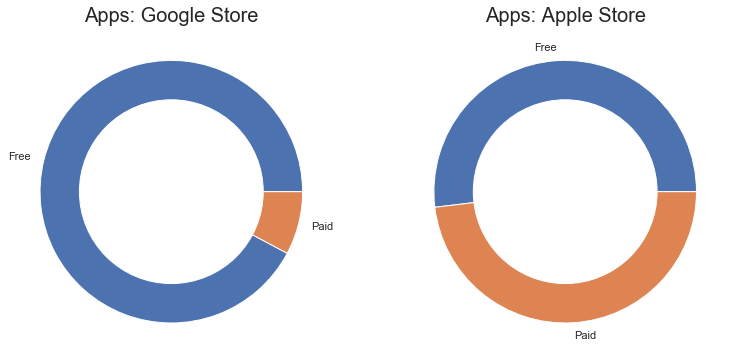

In [83]:
fig, ax = plt.subplots(figsize=(20, 10), subplot_kw=dict(aspect="equal"))

# Create a pieplot for Google Store
ax1 = plt.subplot(131)
plt.pie(df_android_type['Count_type'], labels=df_android_type['Type'].unique())
ax1.set_title('Apps: Google Store', fontsize=20)


# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)


# Create a pieplot for Apple Store
ax2 = plt.subplot(132)
plt.pie(df_ios_type['Count_type'], labels=df_ios_type['Type'].unique())
ax2.set_title('Apps: Apple Store', fontsize=20)

 
# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

### Number of apps per category

In [84]:
# Most common catergory

df_android_category = df_android.groupby(['Category']).size().reset_index(name='count') 
print(df_android_category)

               Category  count
0   ART_AND_DESIGN       60   
1   AUTO_AND_VEHICLES    83   
2   BEAUTY               53   
3   BOOKS_AND_REFERENCE  211  
4   BUSINESS             418  
5   COMICS               52   
6   COMMUNICATION        309  
7   DATING               170  
8   EDUCATION            106  
9   ENTERTAINMENT        86   
10  EVENTS               64   
11  FAMILY               1840 
12  FINANCE              338  
13  FOOD_AND_DRINK       109  
14  GAME                 932  
15  HEALTH_AND_FITNESS   286  
16  HOUSE_AND_HOME       71   
17  LIBRARIES_AND_DEMO   82   
18  LIFESTYLE            357  
19  MAPS_AND_NAVIGATION  121  
20  MEDICAL              394  
21  NEWS_AND_MAGAZINES   240  
22  PARENTING            60   
23  PERSONALIZATION      372  
24  PHOTOGRAPHY          280  
25  PRODUCTIVITY         368  
26  SHOPPING             199  
27  SOCIAL               234  
28  SPORTS               303  
29  TOOLS                819  
30  TRAVEL_AND_LOCAL     216  
31  VIDE

In [85]:
df_android_category.head()

,Category,count
0,ART_AND_DESIGN,60
1,AUTO_AND_VEHICLES,83
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,211
4,BUSINESS,418


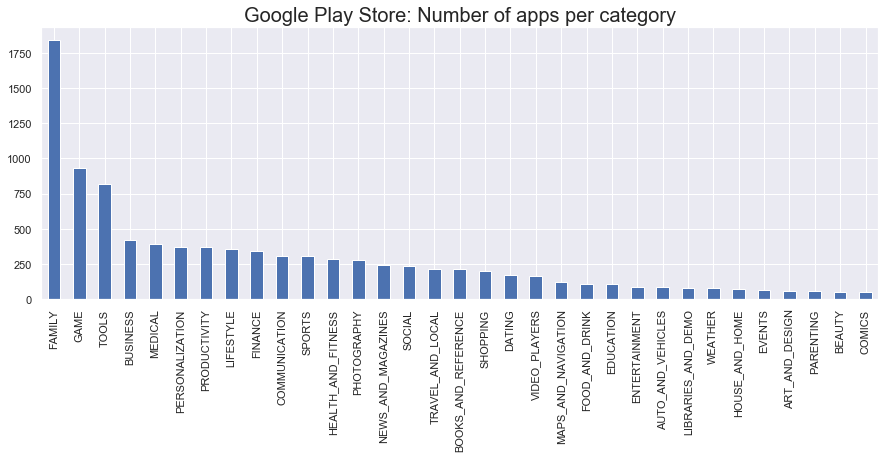

In [86]:
df_android['Category'].value_counts().plot(kind='bar', figsize=(15, 5), rot=0)
plt.title('Google Play Store: Number of apps per category', fontsize=20)
plt.xticks(rotation=90);

### Distribution of paid and free apps per category

In [87]:
df_android_type = df_android.groupby(['Type']).size().reset_index(name='Count_type')
print(df_android_type)

   Type  Count_type
0  Free  8735      
1  Paid  736       


In [88]:
# Create data frame for the analysis of paid and free apps
df_android_category_type = df_android.groupby(['Category', 'Type']).size().reset_index(name='Count_category_type')
df_android_category_type.head(10)

,Category,Type,Count_category_type
0,ART_AND_DESIGN,Free,57
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,81
3,AUTO_AND_VEHICLES,Paid,2
4,BEAUTY,Free,53
5,BOOKS_AND_REFERENCE,Free,187
6,BOOKS_AND_REFERENCE,Paid,24
7,BUSINESS,Free,406
8,BUSINESS,Paid,12
9,COMICS,Free,52


In [89]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0.5
      ),
      label =  refugee_df['Node, Label'].dropna(axis=0, how='any'),
      color = refugee_df['Color']
    ),
    link = dict(
      source = refugee_df['Source'].dropna(axis=0, how='any'),
      target = refugee_df['Target'].dropna(axis=0, how='any'),
      value = refugee_df['Value'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Refugee movement through Manus and Nauru, via <a href='http://www.bryanbrussee.com/sankey.html'>Bryan Brussee</a>",
    height = 772,
    width = 950,
    font = dict(
      size = 10
    ),    
)


fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

NameError: name 'refugee_df' is not defined

In [ ]:
sankey(
    left=df_android_category_type['Type'],
    right=df_android_category_type['Category'], 
    leftWeight=df_android_type['Count_type'],
    aspect=20,
    fontsize=5,
    figureName="type-category"
)

### Type of genre within the category

#### Q1: How many types of genres are in each category?

In [ ]:
# Group data by 'Category' and 'Genre'
df_android_genre_in_cat = df_android.groupby(['Category', 'Genres'])
df_android_genre_in_cat.head()

In [ ]:
# Check number of unique genres per category
df_android_genre_in_cat_Q1 = df_android.groupby(by='Category', as_index=False).agg({'Genres': pd.Series.nunique}).sort_values(by='Genres', ascending=False)
df_android_genre_in_cat_Q1.head(10)

In [ ]:
df_android_genre_in_cat_Q1 = df_android_genre_in_cat_Q1.reset_index(drop=True)

In [ ]:
df_android_genre_in_cat_Q1['Genres']

In [ ]:
my_range = range(1,len(df_android_genre_in_cat_Q1['Genres'])+1)
fig, ax = plt.subplots(figsize=(15,5))
plt.vlines(
    x=df_android_genre_in_cat_Q1['Category'],
    ymin = 0,
    ymax = df_android_genre_in_cat_Q1['Genres'],
    color=['#FF776D', '#002A32'],
    linewidths = 2,
)
plt.plot(df_android_genre_in_cat_Q1['Genres'], "o")
plt.title('Number of genres per category', fontsize=16, pad=15)
plt.ylabel('Number (#)')
plt.xlabel('Category')
plt.xticks(rotation=90)
plt.ylim(0, 80);

#### Q2: Is there a correlation between the number o

In [ ]:
# Check number of genres per category
df_android_genre_in_cat.size()

In [ ]:
# Add a column which shows the number of genres per category
df_android_genre_in_cat = df_android_genre_in_cat.size().reset_index(name='Count_genres')
df_android_genre_in_cat.head(15)

In [90]:
# Split categories into data frames

genre_in_cat_1_5 = ['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS']

In [91]:
df_android_genre_in_cat_1_5 = df_android_genre_in_cat[df_android_genre_in_cat['Category'].isin(genre_in_cat_1_5)]
df_android_genre_in_cat_1_5.head(10)

NameError: name 'df_android_genre_in_cat' is not defined

In [92]:
# Create chart to vizualize the data

sankey(
    left=df_android_genre_in_cat_1_5['Category'], right=df_android_genre_in_cat_1_5['Genres'], rightWeight=df_android_genre_in_cat_1_5['Count_genres'], aspect=20,
    fontsize=10, figureName="category-genres"
)

NameError: name 'df_android_genre_in_cat_1_5' is not defined

#### Number of apps per genre

In [93]:
# Most common genres in each market
df_android_genres = df_android.groupby(['Genres']).size().reset_index(name='Count_genres')
#df_android['Apps_per_genre'] = df.groupby('Genres')['App'].nunique()
print(df_android_genres)

                                    Genres  Count_genres
0    Action                                 299         
1    Action;Action & Adventure              12          
2    Adventure                              72          
3    Adventure;Action & Adventure           5           
4    Adventure;Brain Games                  1           
5    Adventure;Education                    1           
6    Arcade                                 181         
7    Arcade;Action & Adventure              14          
8    Arcade;Pretend Play                    1           
9    Art & Design                           56          
10   Art & Design;Action & Adventure        1           
11   Art & Design;Creativity                6           
12   Art & Design;Pretend Play              1           
13   Auto & Vehicles                        83          
14   Beauty                                 53          
15   Board                                  39          
16   Board;Action & Adventure  

In [94]:
df_android_genres.head()

,Genres,Count_genres
0,Action,299
1,Action;Action & Adventure,12
2,Adventure,72
3,Adventure;Action & Adventure,5
4,Adventure;Brain Games,1


In [95]:
# Percentage value for each genre
df_android_genres['Percentage_genres'] = (df_android_genres['Count_genres'] / df_android_genres['Count_genres'].sum()) * 100
df_android_genres.head()

,Genres,Count_genres,Percentage_genres
0,Action,299,3.156672
1,Action;Action & Adventure,12,0.126689
2,Adventure,72,0.760135
3,Adventure;Action & Adventure,5,0.052787
4,Adventure;Brain Games,1,0.010557


In [96]:
# Sort by the highest to the lowest number of apps in genre (%)
df_android_genres = df_android_genres.sort_values('Percentage_genres', ascending=False)
df_android_genres.head(10)

,Genres,Count_genres,Percentage_genres
108,Tools,818,8.635980
52,Entertainment,549,5.796030
39,Education,495,5.225929
22,Business,418,4.413007
71,Medical,394,4.159628
80,Personalization,372,3.927365
82,Productivity,368,3.885135
67,Lifestyle,356,3.758446
60,Finance,338,3.568412
36,Communication,309,3.262247


In [97]:
# Seperate top 10 apps with the others
top_genres = ['Tools', 'Entertainment', 'Education', 'Business', 'Medical', 'Personalization', 'Productivity', 
                 'Lifestyle', 'Finance', 'Communication', 'Sports', 'Action', 'Health & Fitness', 'Photography',
                 'News & Magazines']

df_android_genres['Top'] = df_android_genres['Genres'].isin(top_genres)
df_android_genres.head(20)

,Genres,Count_genres,Percentage_genres,Top
108,Tools,818,8.635980,True
52,Entertainment,549,5.796030,True
39,Education,495,5.225929,True
22,Business,418,4.413007,True
71,Medical,394,4.159628,True
80,Personalization,372,3.927365,True
82,Productivity,368,3.885135,True
67,Lifestyle,356,3.758446,True
60,Finance,338,3.568412,True
36,Communication,309,3.262247,True


In [98]:
# Change the name of genres below 10
df_android_genres.loc[df_android_genres['Top'] == False, 'Genres'] = 'Others'
df_android_genres.head(15)

,Genres,Count_genres,Percentage_genres,Top
108,Tools,818,8.635980,True
52,Entertainment,549,5.796030,True
39,Education,495,5.225929,True
22,Business,418,4.413007,True
71,Medical,394,4.159628,True
80,Personalization,372,3.927365,True
82,Productivity,368,3.885135,True
67,Lifestyle,356,3.758446,True
60,Finance,338,3.568412,True
36,Communication,309,3.262247,True


In [99]:
#df_android_genres = df_android_genres.drop(['Top_10'], axis=1)

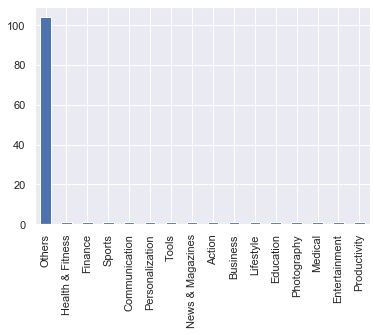

In [100]:
df_android_genres['Genres'].value_counts().plot(kind='bar');

The data represents percentage distribution of apps genres in App Store.

The data represents percentage distribution of apps genres and category
in Google Play Store.

In [101]:
# The average number of user ratings per app category on the App Store


#### Conclusions

The highest number of user ratings per app on the App Store were within entertirement apps including social networking, photo & video apps related and game apps.

In [102]:
# The average number of user ratings per app genre on the Google Play Store

category_android = freq_table(android_clean_english, 1)

for category in category_android:
    total = 0
    len_category = 0
    for app in android_clean_english:
        category_app = app[1]
        if category_app == category:            
            n_installs = app[5]
            n_installs = n_installs.replace('+', '')
            n_installs = n_installs.replace(',', '')
            total += float(n_installs)
            len_category += 1
    avg_n_ratings = total / len_category
    print(category, ':', avg_n_ratings)

NameError: name 'freq_table' is not defined

#### Conclusions

The highest number of user ratings per app on the Google App Store were within video apps but also educational/ growth apps including those for books or education.

## Corellation between rating and installs for Google Play Store

In [103]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
33,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,English
12,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,English
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,English
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,English
16,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up,English


In [104]:
df_android = df_android.reset_index(drop=True)
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Lang
0,Easy Origami Ideas,ART_AND_DESIGN,4.2,1015,11M,"100,000+",Free,0,Everyone,Art & Design,"January 6, 2018",1.1.0,4.1 and up,English
1,Tattoo Name On My Photo Editor,ART_AND_DESIGN,4.2,44829,20M,"10,000,000+",Free,0,Teen,Art & Design,"April 2, 2018",3.8,4.1 and up,English
2,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100+,Free,0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,English
3,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,English
4,Photo Designer - Write your name with shapes,ART_AND_DESIGN,4.7,3632,5.5M,"500,000+",Free,0,Everyone,Art & Design,"July 31, 2018",3.1,4.1 and up,English


In [105]:
# Check unique values for Installs column
df_android['Installs'].unique()

array(['100,000+', '10,000,000+', '100+', '10,000+', '500,000+',
       '1,000,000+', '5,000+', '5,000,000+', '50,000+', '1,000+',
       '50,000,000+', '0+', '10+', '5+', '500+', '50+', '1+',
       '100,000,000+', '1,000,000,000+', '500,000,000+', '0'],
      dtype=object)

In [106]:
# Check unique values for Installs column
df_android['Rating'].unique()

array([4.2, 5. , 4.7, 4.8, 4.1, 4.4, 4.3, 3.9, 3.8, 4.6, 4. , 4.5, nan,
       3.4, 3.2, 4.9, 3.7, 2.1, 3. , 3.1, 3.6, 3.5, 2.6, 3.3, 2.7, 1. ,
       2.9, 2.3, 2.4, 2. , 2.5, 1.7, 2.8, 2.2, 1.9, 1.6, 1.8, 1.5, 1.2,
       1.4])

In [107]:
# Check type of a chosen value in a column `Installs`
type(df_android['Rating'][0])

numpy.float64

In [108]:
df_android = df_android.dropna()

In [109]:
# Check unique values for Installs column
df_android['Rating'].unique()

array([4.2, 5. , 4.7, 4.8, 4.1, 4.4, 4.3, 3.9, 3.8, 4.6, 4. , 4.5, 3.4,
       4.9, 3.7, 2.1, 3. , 3.2, 3.1, 3.6, 3.5, 2.6, 3.3, 2.7, 1. , 2.9,
       2.3, 2.4, 2. , 2.5, 1.7, 2.8, 2.2, 1.9, 1.6, 1.8, 1.5, 1.2, 1.4])

In [110]:
# Check type of a chosen value in a column `Installs`
type(df_android['Installs'][0])

str

In [111]:
# Remove unwanted values (+ and ,)
df_android['Installs'] = df_android['Installs'].str.replace('+', '')
df_android['Installs'] = df_android['Installs'].str.replace(',', '')
df_android['Installs'].head()                                   

0    100000  
1    10000000
2    100     
3    10000   
4    500000  
Name: Installs, dtype: object

In [112]:
# Change str into int (Installs column)
df_android['Installs'] = df_android['Installs'].astype(int)
type(df_android['Installs'][0])

numpy.int64

In [113]:
# normality
#print(shapiro(df_android['Installs']), shapiro(df_android['Rating']))

In [116]:
# normality check (mean=median)
print('Installs normality', df_android['Installs'].mean()/ df_android['Installs'].median())
print('Rating normality', df_android['Rating'].mean()/ df_android['Rating'].median())

Installs normality 92.85187880489917
Rating normality 0.9703627193449359


The data for installs is not normality distributed since the ratio between mean and median is not ~1, however, for ratings the data can be normally ditributes the ratio (mean/median) is ~1.

Since the values I want to take into account in the correlation analysis are not normally distributed (one of them), I apply 